# Credit Card Fraud Detection

Fonte: https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87

Suponha que você seja contratado para ajudar uma empresa de cartão de crédito a detectar possíveis casos de fraude, para que os clientes tenham certeza de que não serão cobrados pelos itens que não compraram. Você recebe um conjunto de dados contendo as transações entre as pessoas, as informações de que são fraudes ou não.

O uso de machine learning pode ser uma valiosa ferramenta na detecção de fraudes de cartão. Modelos de aprendizado supervisionado e não supervisionado podem identificar padrões e comportamentos suspeitos em transações de cartão com base em dados históricos. Além disso, algoritmos de detecção de anomalias podem identificar transações que se desviam do comportamento típico, e a atualização em tempo real dos modelos permite uma detecção mais rápida e precisa. No entanto, é importante combinar várias abordagens de segurança e garantir a privacidade dos dados dos clientes ao implementar soluções de detecção de fraudes com machine learning.

Nossa intenção final é enfrentar essa situação criando modelos de classificação para classificar e distinguir as transações fraudulentas.

Por que Classificação? 

A classificação é o processo de prever variáveis discretas (binárias, sim/não, etc.).

Etapas Envolvidas

1. Importando os pacotes necessários para nosso ambiente python.
2. Importando os dados
3. Processamento dos dados de acordo com as nossas necessidades e Análise Exploratória de Dados
4. Seleção de recursos e divisão de dados
5. Construindo seis tipos de modelos de classificação
6. Avaliando os modelos de classificação criados usando as métricas de avaliação

Estamos usando python para este projeto porque é realmente fácil usar vários métodos, possui uma grande quantidade de pacotes para aprendizado de máquina e pode ser aprendido facilmente. 


Criar o ambiente.

Instalar as libs: 

- numpy
- pandas
- matplotlib
- scikit-learn
- termcolor
- itertools
- jupyter

In [2]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

### Processamento de dados

Sobre os dados: Os dados que vamos usar são o conjunto de dados Kaggle Credit Card Fraud Detection. Ele contém as características V1 a V28 que são os principais componentes obtidos pelo PCA. Os recursos restantes são o 'Valor' que contém a quantia total de dinheiro sendo transacionado e 'Classe' que contém se a transação é um caso de fraude ou não.

link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [19]:
df = pd.read_csv('creditcard.csv')
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Vamos dar uma olhada em quantos casos de fraude e não fraude existem em nosso conjunto de dados. Junto com isso, vamos calcular também a porcentagem de casos de fraude nas transações registradas em geral.

In [21]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


Podemos ver que, de 284.807 amostras, existem apenas 492 casos de fraude, o que representa apenas 0,17% do total de amostras. Assim, podemos dizer que os dados com os quais estamos lidando são dados altamente desequilibrados e precisam ser tratados com cuidado ao modelar e avaliar.

Em seguida, obteremos uma visão estatística dos dados de valor de transações fraudulentas e não fraudulentas usando o método 'describe' do pandas.

In [22]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


Ao ver as estatísticas, percebe-se que os valores na variável 'Amount' variam enormemente quando comparados ao restante das variáveis. Para reduzir sua ampla gama de valores, podemos normalizá-lo usando o método 'StandardScaler'.

In [23]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [24]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


### Seleção de recursos e divisão de dados

Neste processo, vamos definir as variáveis independentes (X) e dependentes (Y). Usando as variáveis definidas, dividiremos os dados em um conjunto de treinamento e um conjunto de teste que será usado posteriormente para modelagem e avaliação. Podemos dividir os dados facilmente usando o algoritmo ‘train_test_split’ em python.

In [29]:
# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02 -3.01454177e-01]]
X_test samples :  [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   

### Modelagem

Nesta etapa, construiremos três tipos diferentes de modelos de classificação: Árvore de Decisão, K-Vizinhos Mais Próximos (KNN), Regressão Logística. Embora existam muitos outros modelos que podemos usar, esses são os modelos mais populares usados para resolver problemas de classificação. Todos esses modelos podem ser construídos de forma viável usando os algoritmos fornecidos pelo pacote scikit-learn. 

Vamos implementar esses modelos em python e ter em mente que os algoritmos usados podem levar algum tempo para serem implementados.

In [31]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)



/Users/matmj/curso_trybe/Mentoria-MLII/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Em um projeto que utiliza o scikit-learn (sklearn), uma popular biblioteca de machine learning em Python, é possível utilizar diferentes algoritmos para construir modelos preditivos. Por exemplo, pode-se começar com uma árvore de decisão usando o algoritmo 'DecisionTreeClassifier' do sklearn. Neste caso, é possível especificar parâmetros como 'max_depth', que define o número máximo de divisões na árvore, e 'critério', que determina quando parar de dividir a árvore, sendo 'entropia' uma opção. Os valores previstos pelo modelo são armazenados em uma variável chamada 'tree_yhat'.

Outro algoritmo que pode ser utilizado é o K-Nearest Neighbors (KNN). Para isso, pode-se usar o 'KNeighborsClassifier' do sklearn, especificando o número de vizinhos 'n_neighbors' como 5, por exemplo. Esse valor pode ser ajustado iterativamente para encontrar a melhor opção. Os valores previstos pelo modelo são armazenados em uma variável chamada 'knn_yhat'.

Além disso, é possível utilizar a regressão logística, um algoritmo de classificação. Nesse caso, pode-se usar o 'LogisticRegression' do sklearn, que é uma opção mais simplista. Os valores previstos pelo modelo são ajustados e armazenados na variável 'lr_yhat'. É importante mencionar que a escolha do algoritmo e a definição dos parâmetros podem variar dependendo do contexto e dos dados do projeto, sendo necessário ajustá-los de acordo com as necessidades específicas da detecção de fraudes de cartão.

### Avaliação

Como eu disse antes, neste processo vamos avaliar nossos modelos construídos usando as métricas de avaliação fornecidas pelo pacote scikit-learn. Nosso principal objetivo neste processo é encontrar o melhor modelo para o nosso caso. As métricas de avaliação que usaremos são a métrica de pontuação de precisão, a métrica de pontuação f1 e, finalmente, a matriz de confusão.

#### 1. Pontuação de precisão
A pontuação de precisão é uma das métricas de avaliação mais básicas, amplamente utilizada para avaliar modelos de classificação. A pontuação de precisão é calculada simplesmente dividindo o número de previsões corretas feitas pelo modelo pelo número total de previsões feitas pelo modelo (pode ser multiplicado por 100 para transformar o resultado em uma porcentagem). Geralmente pode ser expresso como:

Pontuação de precisão = Nº de previsões corretas / Nº total de previsões

In [32]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9983848881710614
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9990695551420246


#### 2. Pontuação F1

A pontuação F1, também conhecida como F-score, é uma métrica de avaliação amplamente utilizada para medir a performance de modelos de classificação. Ela é calculada como a média harmônica da precisão e recall do modelo. Essa métrica leva em consideração tanto a precisão, que é a proporção de verdadeiros positivos em relação ao total de predições positivas, quanto o recall, que é a proporção de verdadeiros positivos em relação ao total de positivos reais. O cálculo do F1-score envolve multiplicar o produto da precisão e recall por 2, e dividir o resultado pela soma da precisão e recall. O resultado é uma medida única que pode ser usada para avaliar a performance geral de um modelo de classificação, levando em consideração tanto a precisão quanto o recall de forma equilibrada. Pode ser expresso como:

Pontuação F1 = 2( (precisão * recall) / (precisão + recall) )

In [33]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.1636363636363636
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7464114832535885


#### 3. Matriz de Confusão

Normalmente, uma matriz de confusão é uma visualização de um modelo de classificação que mostra quão bem o modelo previu os resultados quando comparado aos originais. Normalmente, os resultados previstos são armazenados em uma variável que é então convertida em uma tabela de correlação. Usando a tabela de correlação, a matriz de confusão é plotada na forma de um mapa de calor. Embora existam vários métodos embutidos para visualizar uma matriz de confusão, vamos defini-la e visualizá-la do zero para melhor compreensão. Vamos fazer em python!

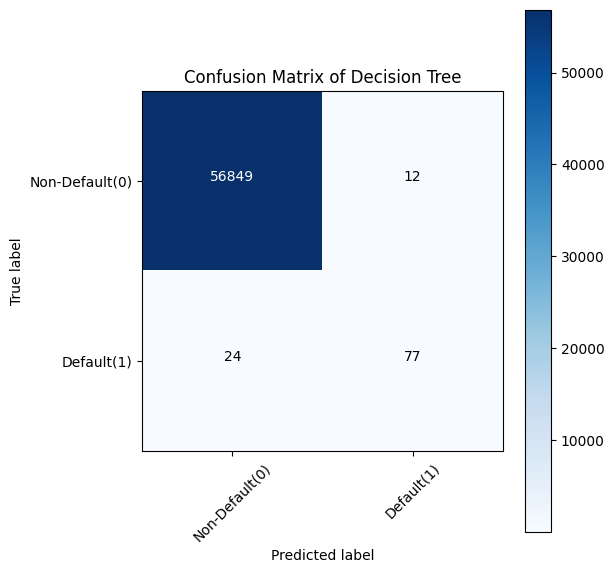

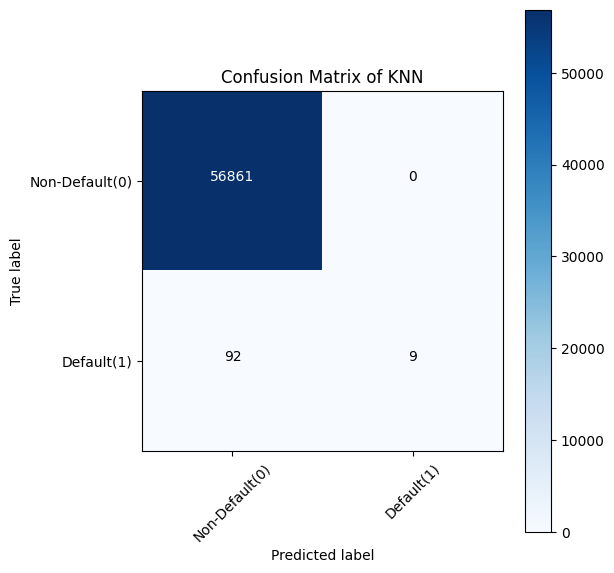

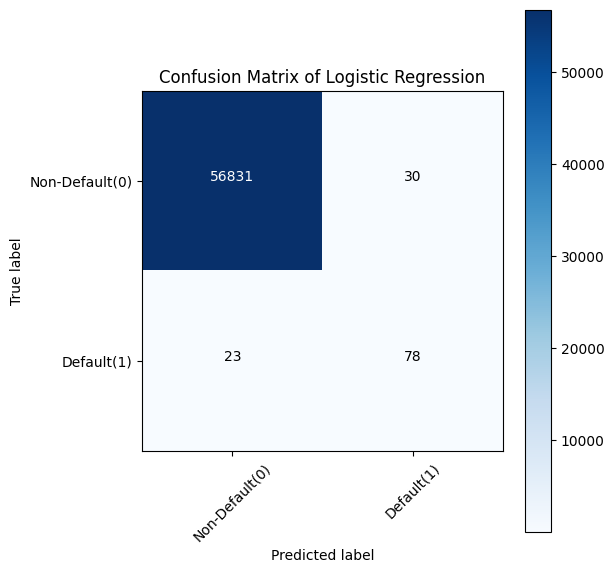

In [34]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()